In [1]:
import pandas as pd
data = pd.read_csv("./data/finalTrain_new2.csv")

In [2]:
data.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source,classes
0,41,f,f,1.30,t,2.50,t,125,109,SVHC,1
1,23,f,f,4.10,t,2.00,t,102,110,other,1
2,46,f,f,0.98,t,2.02,t,109,120,other,1
3,70,t,f,0.16,t,1.90,t,175,110,other,1
4,70,f,f,0.72,t,1.20,t,61,70,SVI,1


In [3]:
on_thyroxine_categories = ['f','t']
goitre_categories = ['f','t']
TSH_measured_categories = ['f','t']
TT4_measured_categories = ['f','t']
referral_source_categories = ['SVHC','other','SVI','STMW','SVHD']

In [4]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
# Define numerical columns and categorical features with ordinal encoding
numerical_cols = ['age', 'TSH', 'T3', 'TT4', 'FTI']
ordinal_encoded_features = ['on_thyroxine', 'goitre', 'TSH_measured', 'TT4_measured', 'referral_source']
ordinal_categories = [on_thyroxine_categories, goitre_categories, TSH_measured_categories, TT4_measured_categories, referral_source_categories]

# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Ordinal Encoded Pipeline
ordinal_encoded_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories)),
    ('scaler', StandardScaler())
])

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_cols),
    ('ordinal_encoded_pipeline', ordinal_encoded_pipeline, ordinal_encoded_features)
])

In [6]:
# Train-test split
X = data.drop('classes', axis=1)
y = data['classes']

In [7]:
X.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source
0,41,f,f,1.30,t,2.50,t,125,109,SVHC
1,23,f,f,4.10,t,2.00,t,102,110,other
2,46,f,f,0.98,t,2.02,t,109,120,other
3,70,t,f,0.16,t,1.90,t,175,110,other
4,70,f,f,0.72,t,1.20,t,61,70,SVI


In [8]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2661    1
2662    1
2663    1
2664    1
2665    1
Name: classes, Length: 2666, dtype: int64

In [9]:
##Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

In [10]:
X_train.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source
2428,13,f,f,4.67,f,2.02,t,94,103,other
427,24,f,f,2.60,t,1.30,t,67,76,SVI
1292,19,f,f,3.70,t,3.00,t,68,80,SVI
2498,58,f,f,0.80,t,2.20,t,96,111,SVI
1977,32,f,f,0.70,t,2.90,t,90,88,SVHC


In [11]:
X_test.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source
526,60,f,f,12.00,t,2.2,t,71,51,SVI
2421,29,f,f,0.80,t,3.1,t,169,114,STMW
2032,14,f,f,0.78,t,2.2,t,78,89,SVI
656,48,f,f,0.42,t,2.5,t,93,82,other
2097,70,f,f,0.90,t,2.6,t,92,103,other


In [12]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9925


In [18]:
from sklearn.metrics import accuracy_score,classification_report
# Model training score
print(f"Model Score : {model.score(X_train,y_train)}")

#model prediction
y_pred = model.predict(X_test)

# Accuacy Score
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

#Classification Report
print(f"Classification Report : \n {classification_report(y_test,y_pred)}")

Model Score : 1.0
Accuracy Score : 0.9925
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        39
           1       1.00      0.99      1.00       740
           2       0.95      0.90      0.93        21

    accuracy                           0.99       800
   macro avg       0.95      0.97      0.95       800
weighted avg       0.99      0.99      0.99       800



In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

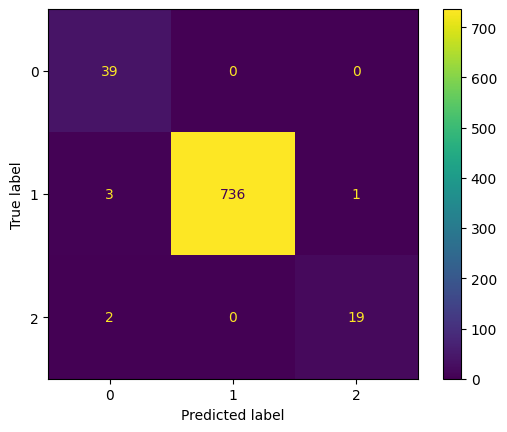

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

## Grid Search CV

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model2 = RandomForestClassifier()

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    'n_estimators': [5,10,15,20,25],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 7],
    'min_samples_split': [1, 2, 3, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features' : ['sqrt', 'log2', 'None'],
    'max_leaf_nodes' : [1,2,3,4]
}

In [28]:
grid_search=GridSearchCV(estimator=model2,param_grid=param_grid,n_jobs=1,cv=5)

In [29]:
grid_search.fit(X_train,y_train)

d:\iNeuronPyTasks\InternShipProject\ThyroidDiseaseDetection\thyroidenv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\iNeuronPyTasks\InternShipProject\ThyroidDiseaseDetection\thyroidenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45000 fits failed out of a total of 72000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12000 fits failed with the following error:
Traceback (most recent call last):
  File "d:\iNeuronPyTasks\InternShipProject\ThyroidDiseaseDetection\thyroidenv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'max_leaf_nodes': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [5, 10, 15, 20, 25]})

In [30]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       max_leaf_nodes=4, min_samples_leaf=2, n_estimators=5)

In [31]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 5}